In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import scipy.stats as st
import datetime as dt

In [2]:
train_data = pd.read_csv(r"./dataset/train.csv")

In [3]:
train_data.describe(include="all")

,Customer_ID,No_of_orders_placed,Category_of_customers,Maximum_bill,Minimum_bill,Last_order_placed_date,No_of_issues_raised,Customer_rating,Average_food_rating,Average_happiness_rating,Coupon_consumption_status,Coupons_offered,Premium_membership,Discount_percentage
count,53802,52227.000000,53802,53802.000000,53802.000000,53802,52227.000000,53802.000000,53802.000000,53802.000000,52766.000000,52233.000000,53802,53802.000000
unique,53802,NaN,3,NaN,NaN,53287,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,ID0xb418,NaN,Inactive,NaN,NaN,02/12/2021 02:48 AM,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,1,NaN,24599,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,43051,NaN
mean,NaN,127.425717,NaN,1949.654984,197.730306,NaN,127.425717,3.873573,3.695476,3.682447,74.673919,184.338062,NaN,36.366585
std,NaN,92.353764,NaN,1164.927983,82.428997,NaN,92.353764,0.641525,0.842041,0.848187,42.240441,97.585717,NaN,9.685505
min,NaN,-477.349415,NaN,-5623.061588,-304.917730,NaN,-477.349415,2.000000,1.000000,2.000000,5.000000,15.000000,NaN,10.000000
25%,NaN,62.000000,NaN,1114.447500,135.290000,NaN,62.000000,4.000000,3.000000,3.000000,39.000000,88.000000,NaN,30.000000
50%,NaN,127.000000,NaN,1912.030000,193.940000,NaN,127.000000,4.000000,4.000000,4.000000,69.000000,205.000000,NaN,36.000000
75%,NaN,193.000000,NaN,2723.627500,255.267500,NaN,193.000000,4.000000,4.000000,4.000000,106.000000,268.000000,NaN,44.000000


Few points to note from initial observation:

- Customer_ID is a unique column and wont contribute much towards model training in predicting the target variable.
- No_of_orders_placed and No_of_issue_raised looks exactly similar.
- The Last_order_placed_date can be converted to number_of_days_since_last_order by subtracting current date with the Last_order_placed_date.

In [4]:
#Dropping the customer Id column
train_data.drop('Customer_ID',inplace=True,axis=1)

### Numerical Features

In [6]:
#Describe the numerical features
train_data.describe(include=[np.number])

,No_of_orders_placed,Maximum_bill,Minimum_bill,No_of_issues_raised,Customer_rating,Average_food_rating,Average_happiness_rating,Coupon_consumption_status,Coupons_offered,Discount_percentage
count,52227.000000,53802.000000,53802.000000,52227.000000,53802.000000,53802.000000,53802.000000,52766.000000,52233.000000,53802.000000
mean,127.425717,1949.654984,197.730306,127.425717,3.873573,3.695476,3.682447,74.673919,184.338062,36.366585
std,92.353764,1164.927983,82.428997,92.353764,0.641525,0.842041,0.848187,42.240441,97.585717,9.685505
min,-477.349415,-5623.061588,-304.917730,-477.349415,2.000000,1.000000,2.000000,5.000000,15.000000,10.000000
25%,62.000000,1114.447500,135.290000,62.000000,4.000000,3.000000,3.000000,39.000000,88.000000,30.000000
50%,127.000000,1912.030000,193.940000,127.000000,4.000000,4.000000,4.000000,69.000000,205.000000,36.000000
75%,193.000000,2723.627500,255.267500,193.000000,4.000000,4.000000,4.000000,106.000000,268.000000,44.000000
max,724.669533,10147.345902,821.409409,724.669533,5.000000,5.000000,5.000000,170.000000,370.000000,59.000000


### Categorical Features

In [7]:
#Describe the categorical features
train_data.describe(include=[object])

,Category_of_customers,Last_order_placed_date,Premium_membership
count,53802,53802,53802
unique,3,53287,2
top,Inactive,02/12/2021 02:48 AM,No
freq,24599,3,43051


### Missing values Analysis

<AxesSubplot:>

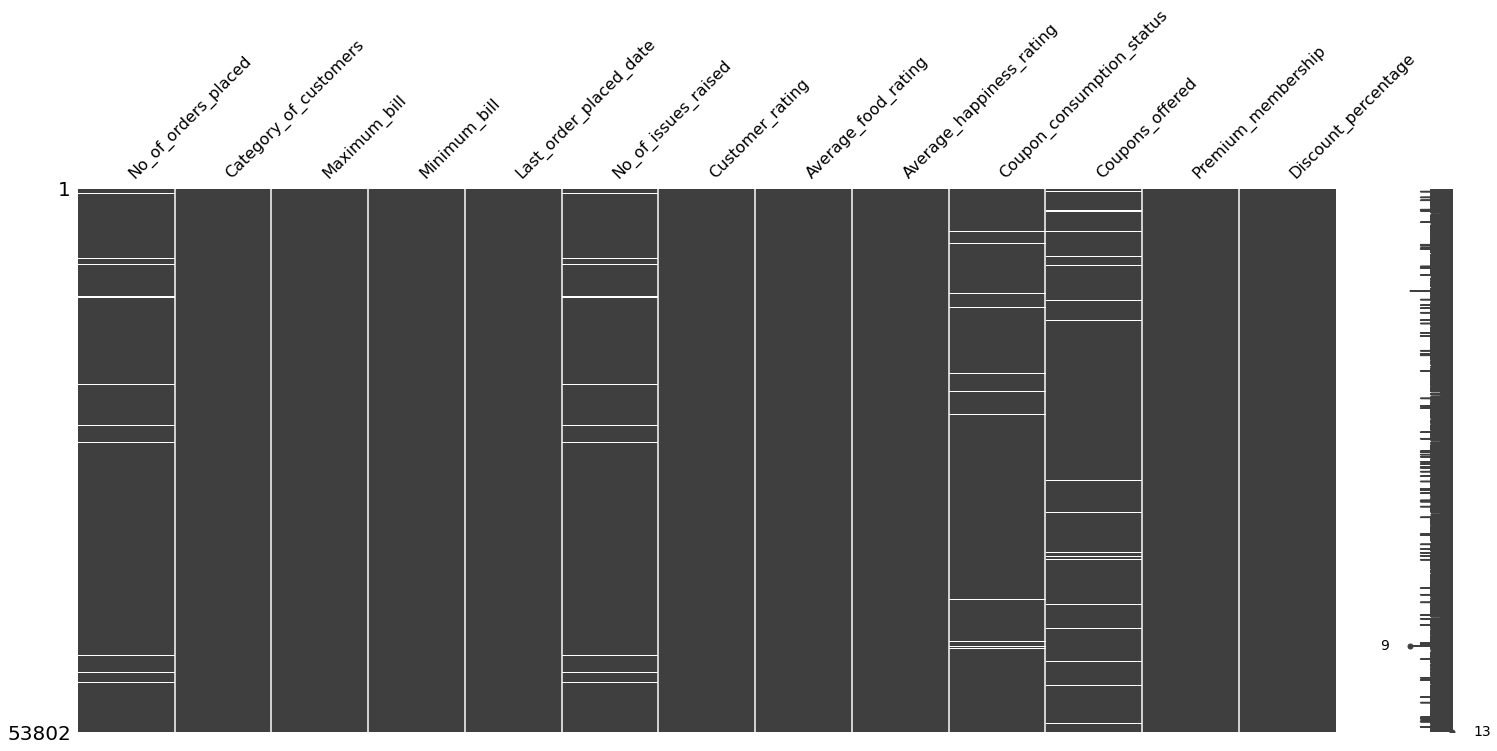

In [8]:
msno.matrix(train_data.sample(train_data.shape[0]))

- Null values in No_of_order_placed then null values in no_of_issue_raised and these features are same/one can be used.
- Average food rating and average happiness rating are similar to one another (can be correlated with customer rating)

In [21]:
numeric_features = train_data.select_dtypes(include=[np.number])

categorical_features = train_data.select_dtypes(include=[object])

In [22]:
#Checking for empty/null values in numeric features.
numeric_features.isnull().sum()

No_of_orders_placed          1575
Maximum_bill                    0
Minimum_bill                    0
No_of_issues_raised          1575
Customer_rating                 0
Average_food_rating             0
Average_happiness_rating        0
Coupon_consumption_status    1036
Coupons_offered              1569
Discount_percentage             0
days_since_order                0
dtype: int64

In [23]:
categorical_features.isnull().sum()

Category_of_customers    0
Premium_membership       0
dtype: int64

## Box Plot

Here I plot box plot to do some analysis on outliers

<AxesSubplot:>

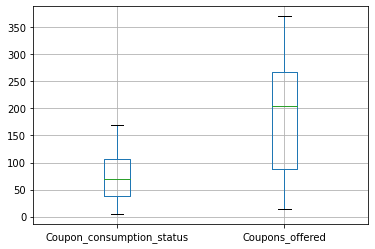

In [9]:
train_data.boxplot(['Coupon_consumption_status','Coupons_offered'])

<AxesSubplot:>

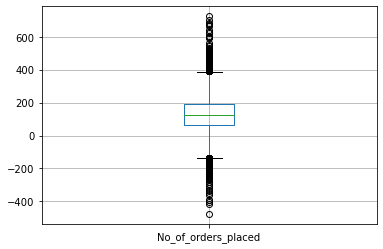

In [10]:
train_data.boxplot(['No_of_orders_placed'])

<AxesSubplot:>

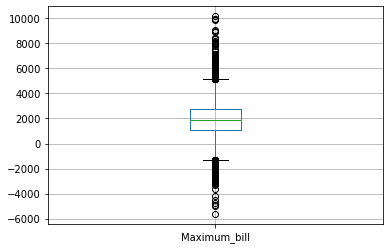

In [11]:
train_data.boxplot(['Maximum_bill'])

<AxesSubplot:>

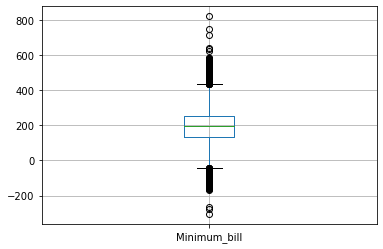

In [12]:
train_data.boxplot(['Minimum_bill'])

In [15]:
train_data['Last_order_placed_date'] = pd.to_datetime(train_data['Last_order_placed_date'])

train_data['days_since_order'] = (dt.datetime.now() - train_data['Last_order_placed_date']).dt.days

<AxesSubplot:>

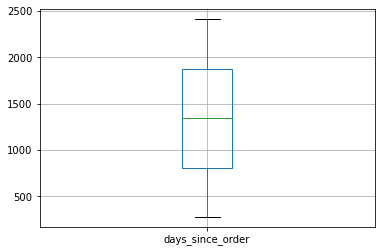

In [16]:
train_data.boxplot(['days_since_order'])

## Pair Plots

In [17]:
sns.set()
columns1 = ['No_of_orders_placed', 'Maximum_bill', 'Minimum_bill',
       'No_of_issues_raised','Discount_percentage'] 

columns2 = ['Customer_rating', 'Average_food_rating',
       'Average_happiness_rating', 'Coupon_consumption_status',
       'Coupons_offered', 'Discount_percentage']

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


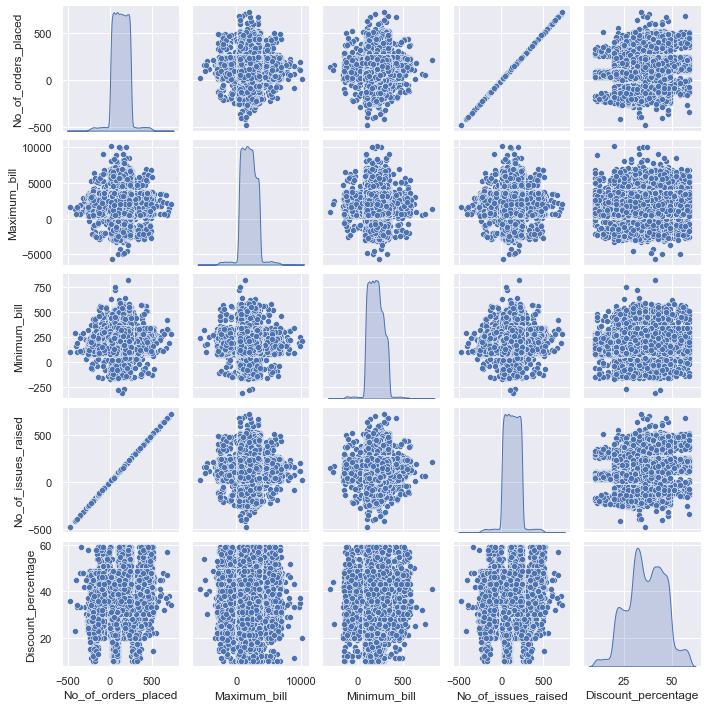

In [18]:
sns.set()
sns.pairplot(train_data[columns1],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


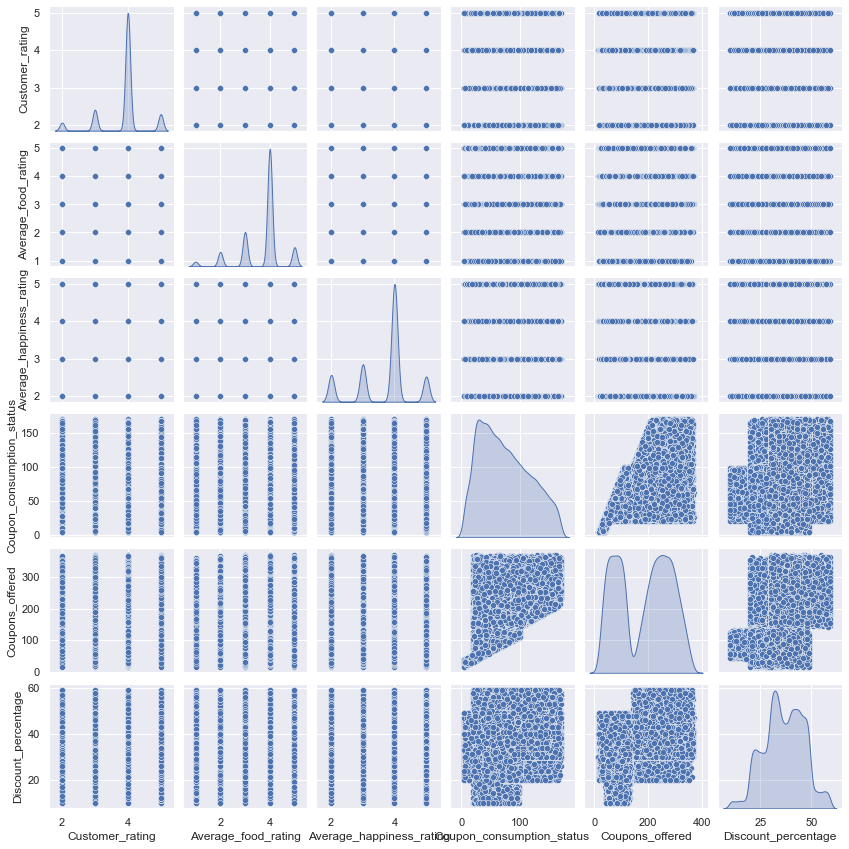

In [19]:
sns.set()
sns.pairplot(train_data[columns2],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

## Duplicate Check

In [20]:
train_data[train_data.duplicated()]

,No_of_orders_placed,Category_of_customers,Maximum_bill,Minimum_bill,Last_order_placed_date,No_of_issues_raised,Customer_rating,Average_food_rating,Average_happiness_rating,Coupon_consumption_status,Coupons_offered,Premium_membership,Discount_percentage,days_since_order


The dataset does not have any duplicates